In [11]:
import itertools
import warnings

import matplotlib
from pyasn1.compat.octets import null
from sklearn.metrics import silhouette_score
from text_unidecode import unidecode
from collections import deque
from tqdm import tqdm
warnings.filterwarnings('ignore')
import csv
from konlpy.tag import Okt
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.patches as mpatcheso
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.preprocessing import StandardScaler

C0_text = pd.read_excel('Q로만든 A의0클러스터말뭉치.xlsx')
C1_text = pd.read_excel('Q로만든 A의1클러스터말뭉치.xlsx')
C2_text = pd.read_excel('Q로만든 A의2클러스터말뭉치.xlsx')

In [12]:
C0_text = C0_text[0]
C1_text = C1_text[0]
C2_text = C2_text[0]

In [6]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','이하','위','등','및','시오','이내','위해','대해','것','구체','그','상세','입력','작성','가능','가장','설명','궃','대체','수','통해','부항','가지','목','체','점','개','후','내외','앞','입','주','중','곳','바','서술','계','통','준','나','때', '속', '그것', '내', '관', '거나', '더', '부분', '여러분', '줄', '외', '해', '또한', '예', '각', '우선', '로서', '끝', '꼭', '문항', '이제', '조금', '부문', '그때', '안', '교', '알', '비', '주시', '직', '자의', '만', '업','데', '움', '샘', '온', '회', '뒤', '순', '두','또','강','면','택','합','먼저']
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
C0_word = []
C1_word = []
C2_word = []

for sentence in tqdm(C0_text):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    C0_word.append(stopwords_removed_sentence)
for sentence in tqdm(C1_text):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    C1_word.append(stopwords_removed_sentence)
for sentence in tqdm(C2_text):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    C2_word.append(stopwords_removed_sentence)



100%|██████████| 16757/16757 [15:22<00:00, 18.16it/s]


In [13]:
# print(len(C0_word))
# print(C0_word)
C0_word_save = C0_word
C1_word_save = C1_word
C2_word_save = C2_word

In [14]:
Q_del_tump = ['이하','위','등','및','시오','이내','위해','대해','것','구체','그','상세','입력','작성','가능','가장','설명','궃','대체','수','통해','부항','가지','목','체','점','개','후','내외','앞','입','주','중','곳','바','서술','계','통','준','나','때', '속', '그것', '내', '관', '거나', '더', '부분', '여러분', '줄', '외', '해', '또한', '예', '각', '우선', '로서', '끝', '꼭', '문항', '이제', '조금','부문', '그때', '안', '교', '알', '비', '주시', '직', '자의', '만', '업','데', '움', '샘', '온', '회', '뒤', '순', '두','또','강','면','택','합','먼저','저','자수','제','대한','전','적','번','함','임','명','감','못','남','첫','시','힘','로','날','낼','뿐','분','달','창','깨','첫째','누구','법','둘째','정','접','차','이처럼','단','볼','향','집','발','율','선','군','타','원','몸','사','별','물','살','세','저','실','저','편','식','률','항','판','네','번의','게']

In [15]:
for i in range(len(C0_word)):
    for j in range(len(Q_del_tump)):
        t = Q_del_tump[j]
        if t in C0_word[i]:
            C0_word[i].remove(t)
        else:
            continue
            
for i in range(len(C1_word)):
    for j in range(len(Q_del_tump)):
        t = Q_del_tump[j]
        if t in C1_word[i]:
            C1_word[i].remove(t)
        else:
            continue

for i in range(len(C2_word)):
    for j in range(len(Q_del_tump)):
        t = Q_del_tump[j]
        if t in C2_word[i]:
            C2_word[i].remove(t)
        else:
            continue            

In [17]:
C2_word

[['실무',
  '경험',
  '어학',
  '능력',
  '멀티플레이어',
  '관리',
  '관련',
  '실무',
  '경험',
  '학교',
  '재무',
  '관리회계',
  '지식',
  '외국어',
  '역량',
  '상경',
  '계열',
  '뜻',
  '고등학교',
  '노사',
  '관계',
  '어서',
  '전략',
  '수립',
  '빈민촌',
  '자생',
  '사업',
  '기획',
  '기업',
  '국가',
  '외부',
  '상황',
  '분석',
  '성장',
  '전략',
  '활동',
  '학과',
  '진학',
  '경영',
  '관리',
  '업무',
  '기본',
  '재무회계',
  '지식',
  '기반',
  '동안',
  '학업',
  '회계',
  '원리',
  '회계',
  '재무관리',
  '기업',
  '재무',
  '과목',
  '숫자',
  '방학',
  '자격증',
  '공부',
  '지식',
  '결과',
  '재무제표',
  '시장',
  '추세',
  '예측',
  '자료',
  '숫자',
  '자료',
  '내재',
  '정보',
  '이해',
  '이후',
  '실무',
  '창업',
  '활동',
  '전략',
  '인턴',
  '활동',
  '리서치',
  '기업',
  '가치',
  '분석',
  '도움',
  '계획',
  '자금',
  '조달',
  '소비',
  '원가',
  '관리',
  '역량',
  '교환학생',
  '파견',
  '당시',
  '계획',
  '교통비',
  '통신비',
  '포함',
  '한정',
  '예산',
  '프로그램',
  '참여',
  '유럽',
  '개국',
  '여행',
  '비록',
  '예산',
  '비수',
  '교통',
  '숙박시설',
  '예약',
  '재료',
  '구매',
  '근처',
  '친구',
  '효과',
  '예산',
  '절감',
  '방안',
  '계획',
  '일',
  '창업',
  '팀',
  '시드머니',

In [16]:
from gensim.models import Word2Vec

# Q0model = Word2Vec(sentences = C0_word, vector_size = 300, window = 5, min_count = 0, workers = 5, sg = 0)
# Q1model = Word2Vec(sentences = C1_word, vector_size = 300, window = 5, min_count = 0, workers = 5, sg = 0)
Q2model = Word2Vec(sentences = C2_word, vector_size = 300, window = 5, min_count = 0, workers = 5, sg = 0)
# Q0model.save('./A0wordvec_real.model')
# Q1model.save('./A1wordvec_real.model')
Q2model.save('./A2wordvec_real.model')
#각 질문클러스터 유형별 답변 모델

자기소개서의 답변 명사 가장 많은 것 : 610
자기소개서 답변의 평균 명사 수 : 93.96124963188377


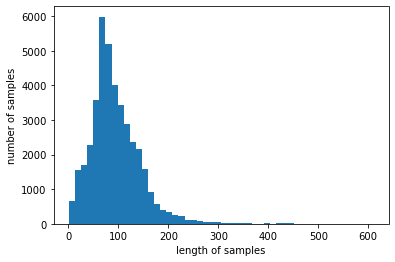

In [134]:
print('자기소개서의 답변 명사 가장 많은 것 :',max(len(review) for review in tokenized_data))
print('자기소개서 답변의 평균 명사 수 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [142]:
print(len(Q0nvocab1))
print(len(Q1nvocab1))
print(len(Q2nvocab1))

20423
20848
23172


In [136]:
from functools import reduce 
import operator

#1차원 리스트로 변환
Q0word = list(reduce(operator.add, C0_word))
Q1word = list(reduce(operator.add, C1_word))
Q2word = list(reduce(operator.add, C2_word))

import nltk
from nltk import FreqDist
Q0nvocab1 = FreqDist(np.hstack(Q0word))
Q1nvocab1 = FreqDist(np.hstack(Q1word))
Q2nvocab1 = FreqDist(np.hstack(Q2word))
Q0nvocab = Q0nvocab1.most_common(1000)
Q1nvocab = Q1nvocab1.most_common(1000)
Q2nvocab = Q2nvocab1.most_common(1000)
Q0tokokenx= pd.DataFrame(Q0nvocab)
Q1tokokenx= pd.DataFrame(Q1nvocab)
Q2tokokenx= pd.DataFrame(Q2nvocab)
Q0tokokenx.columns=["word","count"]
Q1tokokenx.columns=["word","count"]
Q2tokokenx.columns=["word","count"]
Q0tokokenx.to_excel('./0말뭉치워드카운팅.xlsx')
Q1tokokenx.to_excel('./1말뭉치워드카운팅.xlsx')
Q2tokokenx.to_excel('./2말뭉치워드카운팅.xlsx')
print(Q2tokokenx)
print(Q0tokokenx)
print(Q2nvocab1)
print(Q0nvocab1)

    word  count
0     생각  19106
1      글  16036
2     경험  14744
3     고객  12634
4     업무  12403
..   ...    ...
995   여름    274
996  호기심    274
997   관해    274
998   편입    274
999   음료    274

[1000 rows x 2 columns]
    word  count
0     생각  13614
1      글  11331
2     경험  10663
3     업무   8345
4      일   8210
..   ...    ...
995  모비스    195
996   무기    195
997  적극성    195
998   단축    195
999  백화점    195

[1000 rows x 2 columns]
<FreqDist with 23172 samples and 1563316 outcomes>
<FreqDist with 20423 samples and 1107170 outcomes>


In [137]:
print(len(Q0tokokenx))
print(len(Q1tokokenx))
print(len(Q2tokokenx))

1000
1000
1000


In [18]:
Q = pd.read_excel('인천추가제안엑셀v0.2.xlsx')

In [188]:
Q

,0,word,count,label
0,1,기술,9078,2
1,2,경험,7144,1
2,3,본인,6282,0
3,4,지원,4878,2
4,5,직무,3794,2
...,...,...,...,...
95,96,변화,318,0
96,97,개인,315,0
97,98,전공,314,2
98,99,발휘,310,2


In [19]:
Q0 = Q['label'] == 0
Q1 = Q['label'] == 1
Q2 = Q['label'] == 2

cq0_t = Q[Q0]
cq1_t = Q[Q1]
cq2_t = Q[Q2]

In [191]:
cq0_t.to_excel('임시0.xlsx')
cq1_t.to_excel('임시1.xlsx')
cq2_t.to_excel('임시2.xlsx')

In [20]:
cq0_t = cq0_t['word'].values.tolist()
cq1_t = cq1_t['word'].values.tolist()
cq2_t = cq2_t['word'].values.tolist()

In [21]:
# love0 = []
# for txt in cq0_t:
#     love0.append(Q0model.wv.most_similar(txt, topn=20))
# love1 = []
# for txt in cq1_t:
#     love1.append(Q1model.wv.most_similar(txt, topn=20))    
love2 = []
for txt in cq2_t:
    love2.append(Q2model.wv.most_similar(txt, topn=20))    

In [31]:
Q2model.wv.most_similar('약점', topn=90)

[('단점', 0.8531786799430847),
 ('작용', 0.8023558259010315),
 ('장점', 0.7705205678939819),
 ('성격', 0.7600263953208923),
 ('강점', 0.7450789213180542),
 ('반면', 0.7333747148513794),
 ('다소', 0.7265868782997131),
 ('고집', 0.7089086771011353),
 ('다혈질', 0.7060624957084656),
 ('유연성', 0.6953566074371338),
 ('지니', 0.6910600662231445),
 ('편광판', 0.6908656358718872),
 ('완벽', 0.686142086982727),
 ('성향', 0.6855661869049072),
 ('세심', 0.6852659583091736),
 ('황소', 0.6748111844062805),
 ('장단점', 0.6709659099578857),
 ('결단', 0.6687908172607422),
 ('경향', 0.6666067242622375),
 ('신속성', 0.6661775708198547),
 ('융통성', 0.6630807518959045),
 ('계획성', 0.6503233909606934),
 ('외향', 0.6498437523841858),
 ('반드시', 0.6463592052459717),
 ('보완', 0.6391525268554688),
 ('치기', 0.636609673500061),
 ('독선', 0.6298904418945312),
 ('오히려', 0.6280672550201416),
 ('오타와', 0.627743661403656),
 ('남', 0.6264370679855347),
 ('순발력', 0.6256874203681946),
 ('때로는', 0.6253824234008789),
 ('직설', 0.6250756978988647),
 ('긍적적', 0.6237561106681824),
 ('디테

In [183]:
love00 = pd.DataFrame(love0)
love01 = pd.DataFrame(love1)
love02 = pd.DataFrame(love2)

In [184]:
love00.to_excel('질문0클러스터에 대한 A연관어.xlsx')
love01.to_excel('질문1클러스터에 대한 A연관어.xlsx')
love02.to_excel('질문2클러스터에 대한 A연관어.xlsx')

In [174]:
len(love1)

34

In [181]:
Q2model.wv.most_similar('기술', topn=20)

[('정보기술', 0.6502030491828918),
 ('연구개발', 0.6354202628135681),
 ('첨단', 0.626038134098053),
 ('접목', 0.6185352802276611),
 ('산업혁명', 0.6075839400291443),
 ('융합', 0.6037079095840454),
 ('유차', 0.6009323000907898),
 ('차세대', 0.596886157989502),
 ('무인기', 0.5871394276618958),
 ('솔루션', 0.5741589665412903),
 ('선행', 0.5717211365699768),
 ('디스플레이', 0.5707833170890808),
 ('최신', 0.5678332448005676),
 ('전자', 0.5657104253768921),
 ('석탄가스', 0.5611091256141663),
 ('시대', 0.5521964430809021),
 ('친환경', 0.5514463782310486),
 ('메모리', 0.5459255576133728),
 ('기술자', 0.5458667874336243),
 ('사주', 0.5457862615585327)]

In [178]:
print(love2[0][0])

('정보기술', 0.6502030491828918)


In [182]:
print(love2[0])

[('정보기술', 0.6502030491828918), ('연구개발', 0.6354202628135681), ('첨단', 0.626038134098053), ('접목', 0.6185352802276611), ('산업혁명', 0.6075839400291443), ('융합', 0.6037079095840454), ('유차', 0.6009323000907898), ('차세대', 0.596886157989502), ('무인기', 0.5871394276618958), ('솔루션', 0.5741589665412903), ('선행', 0.5717211365699768), ('디스플레이', 0.5707833170890808), ('최신', 0.5678332448005676), ('전자', 0.5657104253768921), ('석탄가스', 0.5611091256141663), ('시대', 0.5521964430809021), ('친환경', 0.5514463782310486), ('메모리', 0.5459255576133728), ('기술자', 0.5458667874336243), ('사주', 0.5457862615585327)]


In [1]:
print("2")

2
